# The Sparks Foundation: GRIP APRIL 2021

## TASK 1: Prediction using Supervised ML

## Author - SAKSHI MANKAR

### Problem Statement  -  Predict the percentage of a student based on the no. of study hours.

# Step 1 : Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2 : Loading the Dataset

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


#  Step 3 : Exploratory Data Analysis

In [3]:
df.shape

(25, 2)

### Displaying the first and last 5 rows

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Checking for null values

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## There are no null values in our data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 4: Visualizing Data

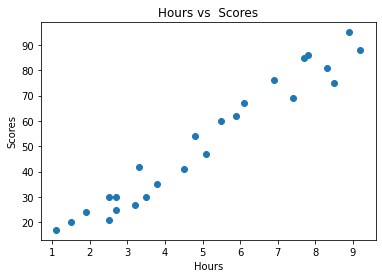

In [9]:
plt.scatter(df.Hours,df.Scores)
plt.title("Hours vs  Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# We can see from the graph that there exists positive correlation

# Step 5: Splitting the data into input and output 

In [13]:
# extracting the x and y columns
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [15]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Step 6 : Splitting the data into train and test data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Step 7: Importing Linear Regression Model and Training it with train data

In [17]:
# create and train the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# Step 8: Predicting the Output

In [18]:
#to test the model we use the X_test as input to get the calculated output
#and then compare it with original(y_test) to see how well the model is working
y_pred = regressor.predict(X_test)

# Step 9: Comparing Actual VS Predicted values 

In [24]:
df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred})
df

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Step 10 : Evaluating the accuracy of the model

In [20]:
# we print the errors of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:       ',mae)
print('Mean Squared Error:        ',mse)
print('Root Mean Squared Error:   ',rmse)
print('R-squared (Accuracy) Score:',r2)

Mean Absolute Error:        4.183859899002975
Mean Squared Error:         21.598769307217406
Root Mean Squared Error:    4.647447612100367
R-squared (Accuracy) Score: 0.9454906892105355


### The accuracy of our model is 94% 

# Step 11: Visualizing the output

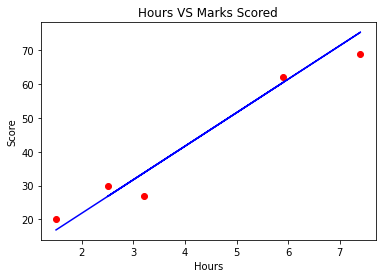

In [21]:
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_pred,c='blue')
plt.title('Hours VS Marks Scored')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

# Step 12: Predicting the score

In [22]:
hours = np.array([9.25,])
score = regressor.predict(hours.reshape(-1,1))
print('The predicted percentage score for 9.25 hours of study is: ',score)

The predicted percentage score for 9.25 hours of study is:  [93.69173249]


# CONCLUSION: 
## 1) The accuracy of our model is 94%
## 2) The predicted percentage scored by a student for 9.25 hours of study is: 93.69%